In [2]:
# Import Libraries

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Num GPUs Available: 1
Mounted at /content/drive


In [3]:
# Load Dataset

DATASET_PATH = "/content/drive/MyDrive/Discriminative_Project_Milestone_1"
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 123


In [4]:
# Split Dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 4108 files belonging to 39 classes.
Using 3287 files for training.
Found 4108 files belonging to 39 classes.
Using 821 files for validation.


In [5]:
# Class names and count

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of classes:", num_classes)

Classes: ['IMAGES_OBJ786', 'IMAGES_OBJ788', 'IMAGES_OBJ789', 'Images_OBJ069', 'image_OBJ007', 'image_OBJ027', 'image_OBJ090', 'image_OBJ787', 'images_OBJ001', 'images_OBJ002', 'images_OBJ003', 'images_OBJ004', 'images_OBJ005', 'images_OBJ006', 'images_OBJ008', 'images_OBJ009', 'images_OBJ010', 'images_OBJ012', 'images_OBJ016', 'images_OBJ018', 'images_OBJ019', 'images_OBJ021', 'images_OBJ022', 'images_OBJ028', 'images_OBJ029', 'images_OBJ031', 'images_OBJ061', 'images_OBJ095', 'images_OBJ107', 'images_OBJ108', 'images_OBJ111', 'images_OBJ159', 'images_OBJ208', 'images_OBJ222', 'images_OBJ229', 'images_OBJ230', 'images_OBJ311', 'images_OBJ405', 'images_OBJ_300']
Number of classes: 39


In [6]:
# Normalize Images

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds   = val_ds.map(lambda x, y: (x / 255.0, y))
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

In [ ]:
# Model 1 (Conv.layer - 3, Activation function - relu, epoch - 20)

model1 = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',
                  input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model1.summary()

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.0444 - loss: 3.5872 - val_accuracy: 0.2119 - val_loss: 3.0135
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.2386 - loss: 2.8803 - val_accuracy: 0.3959 - val_loss: 2.4240
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.3550 - loss: 2.4140 - val_accuracy: 0.4446 - val_loss: 2.1234
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.4293 - loss: 2.1348 - val_accuracy: 0.4787 - val_loss: 1.9930
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4813 - loss: 1.9349 - val_accuracy: 0.5043 - val_loss: 1.8674
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.5073 - loss: 1.8230 - val_accuracy: 0.5871 - val_loss: 1.6094
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5643 - loss: 1.6403 - val_accuracy: 0.5554 - val_loss: 1.5849
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5691 - loss: 1.6013 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7658 - loss: 0.7291
Validation accuracy: 0.7881


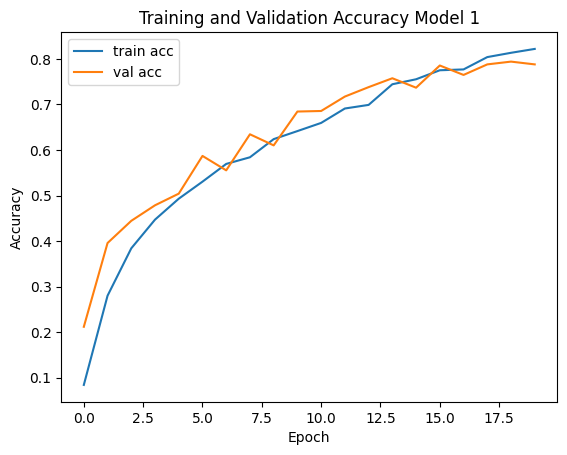

In [ ]:
#Model Evaluation

val_loss, val_acc = model1.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 2 (Conv.layer - 3, Activation function - relu, epoch - 30)

from tensorflow.keras import layers, models

model2 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model2.summary()

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.0382 - loss: 3.6087 - val_accuracy: 0.1620 - val_loss: 3.1755
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.2075 - loss: 2.9687 - val_accuracy: 0.2460 - val_loss: 2.6696
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.3126 - loss: 2.5536 - val_accuracy: 0.3849 - val_loss: 2.2602
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.3882 - loss: 2.2454 - val_accuracy: 0.4665 - val_loss: 2.0590
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.4524 - loss: 2.0359 - val_accuracy: 0.5201 - val_loss: 1.7817
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5241 - loss: 1.7977 - val_accuracy: 0.5895 - val_loss: 1.5545
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5697 - loss: 1.5937 - val_accuracy: 0.5786 - val_loss: 1.5647
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.6152 - loss: 1.4570 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8580 - loss: 0.5463
Validation accuracy: 0.8551


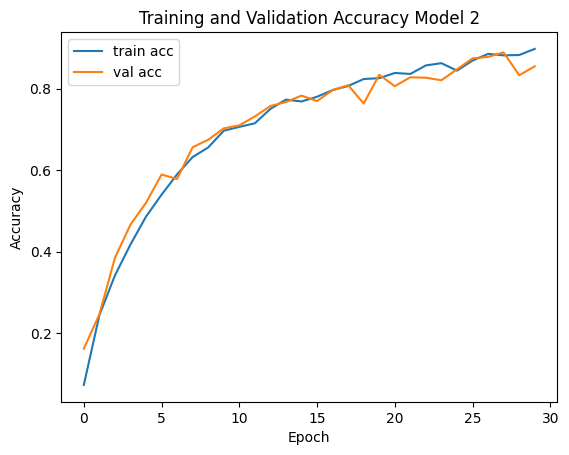

In [ ]:
#Model Evaluation

val_loss, val_acc = model2.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 3 (Conv.layer - 3, Activation function - Leaky relu, epoch - 20)

model3 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model3.summary()

model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.0569 - loss: 3.5519 - val_accuracy: 0.2010 - val_loss: 3.0379
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.2271 - loss: 2.9041 - val_accuracy: 0.3715 - val_loss: 2.4807
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.3603 - loss: 2.4141 - val_accuracy: 0.3995 - val_loss: 2.2467
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.4469 - loss: 2.0806 - val_accuracy: 0.4945 - val_loss: 1.8703
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.4995 - loss: 1.8229 - val_accuracy: 0.5639 - val_loss: 1.6351
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.5532 - loss: 1.6715 - val_accuracy: 0.5773 - val_loss: 1.5338
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.5766 - loss: 1.5105 - val_accuracy: 0.6224 - val_loss: 1.4172
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.6257 - loss: 1.3930 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8116 - loss: 0.6672
Validation accuracy: 0.8185


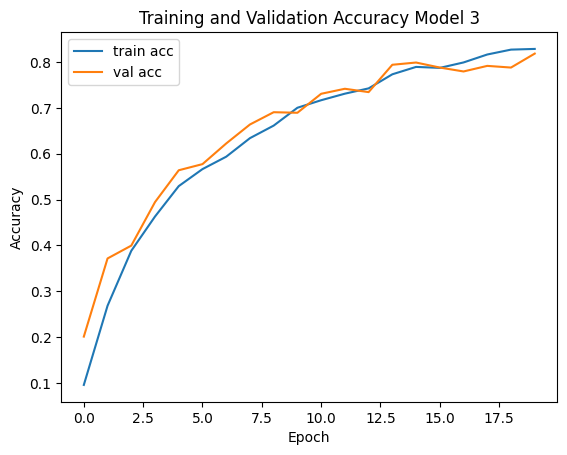

In [ ]:
#Model Evaluation

val_loss, val_acc = model3.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 4 (Conv.layer - 3, Activation function - Leaky relu, epoch - 30)

model4 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model4.summary()

model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.0544 - loss: 3.5482 - val_accuracy: 0.2387 - val_loss: 2.9009
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.2352 - loss: 2.8404 - val_accuracy: 0.3715 - val_loss: 2.4461
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.3583 - loss: 2.4052 - val_accuracy: 0.4178 - val_loss: 2.1529
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.4450 - loss: 2.0825 - val_accuracy: 0.5152 - val_loss: 1.8804
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.5158 - loss: 1.8578 - val_accuracy: 0.5238 - val_loss: 1.7856
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5488 - loss: 1.6722 - val_accuracy: 0.5700 - val_loss: 1.5830
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6038 - loss: 1.5189 - val_accuracy: 0.6626 - val_loss: 1.2950
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6347 - loss: 1.4009 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.8845 - loss: 0.4086
Validation accuracy: 0.8831


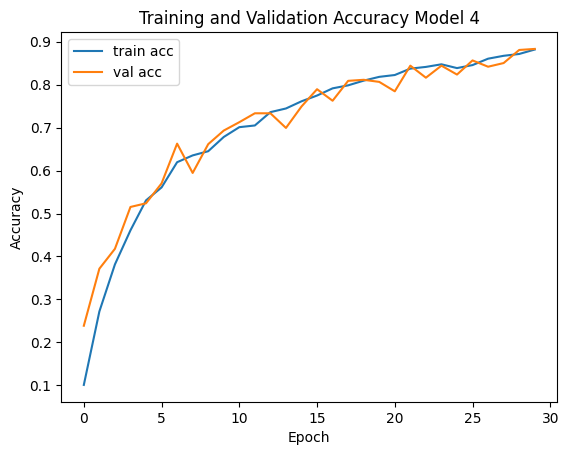

In [ ]:
#Model Evaluation

val_loss, val_acc = model4.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 4')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 5 (Conv.layer - 3, Activation function - ELU, epoch - 20)


model5 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model5.summary()

model5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.0662 - loss: 3.5130 - val_accuracy: 0.1851 - val_loss: 3.0751
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2271 - loss: 2.8346 - val_accuracy: 0.4019 - val_loss: 2.3785
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.4106 - loss: 2.2625 - val_accuracy: 0.4982 - val_loss: 1.9476
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.4906 - loss: 1.8984 - val_accuracy: 0.5043 - val_loss: 1.8329
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.5470 - loss: 1.7183 - val_accuracy: 0.5834 - val_loss: 1.6423
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.5839 - loss: 1.5470 - val_accuracy: 0.6565 - val_loss: 1.3300
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.6387 - loss: 1.3218 - val_accuracy: 0.6261 - val_loss: 1.3865
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6671 - loss: 1.2197 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8797 - loss: 0.4013
Validation accuracy: 0.8587


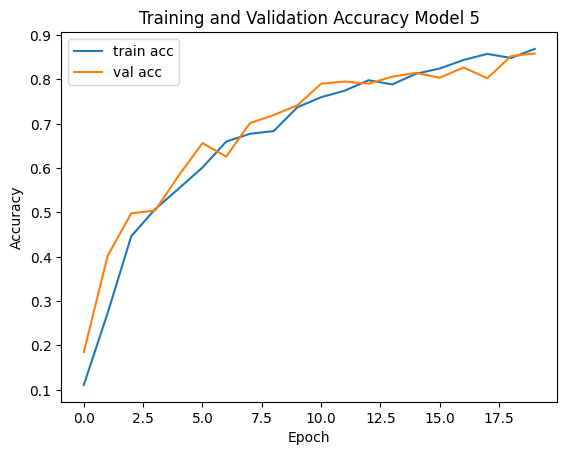

In [ ]:
#Model Evaluation

val_loss, val_acc = model5.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 6 (Conv.layer - 3, Activation function - ELU, epoch - 30)


model6 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model6.summary()

model6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model6.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.0695 - loss: 3.5195 - val_accuracy: 0.2400 - val_loss: 2.8863
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2422 - loss: 2.7842 - val_accuracy: 0.4312 - val_loss: 2.3560
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.3928 - loss: 2.3183 - val_accuracy: 0.4799 - val_loss: 2.0803
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.4819 - loss: 1.9524 - val_accuracy: 0.5639 - val_loss: 1.7175
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.5416 - loss: 1.7086 - val_accuracy: 0.5981 - val_loss: 1.5513
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.6057 - loss: 1.5116 - val_accuracy: 0.6382 - val_loss: 1.4024
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6372 - loss: 1.3228 - val_accuracy: 0.5895 - val_loss: 1.4294
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6533 - loss: 1.2532 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8608 - loss: 0.4731
Validation accuracy: 0.8636


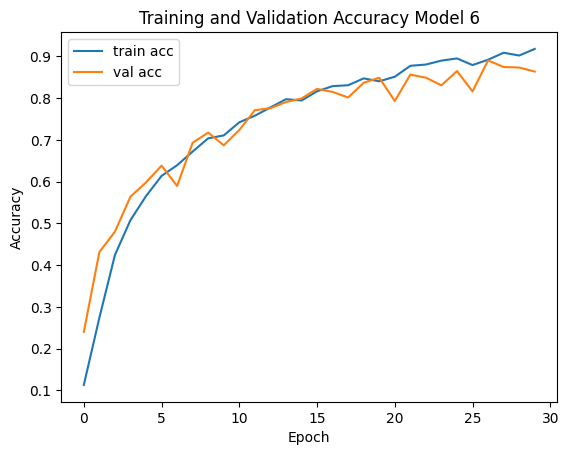

In [ ]:
#Model Evaluation

val_loss, val_acc = model6.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 6')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 7 (Conv.layer - 3, Activation function - Swish, epoch - 20)


model7 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model7.summary()

model7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model7.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.0435 - loss: 3.5793 - val_accuracy: 0.1937 - val_loss: 3.0801
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2161 - loss: 2.9250 - val_accuracy: 0.3557 - val_loss: 2.5281
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3870 - loss: 2.3698 - val_accuracy: 0.5006 - val_loss: 1.9852
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.4848 - loss: 1.9571 - val_accuracy: 0.5445 - val_loss: 1.7512
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.5472 - loss: 1.7237 - val_accuracy: 0.5639 - val_loss: 1.5844
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6021 - loss: 1.5044 - val_accuracy: 0.5956 - val_loss: 1.4271
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6345 - loss: 1.3533 - val_accuracy: 0.6273 - val_loss: 1.3053
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6620 - loss: 1.2435 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8576 - loss: 0.5403
Validation accuracy: 0.8477


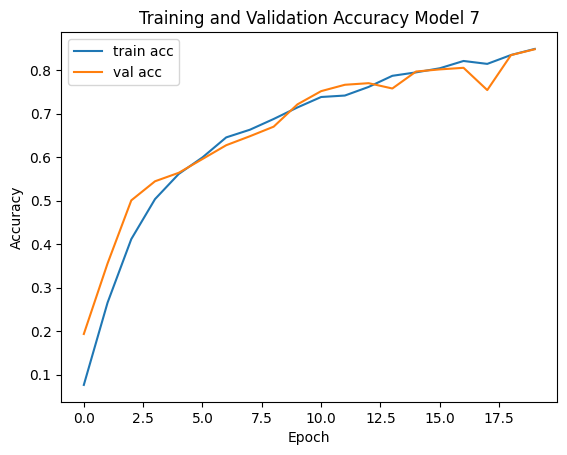

In [ ]:
#Model Evaluation

val_loss, val_acc = model7.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 7')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 8 (Conv.layer - 3, Activation function - Swish, epoch - 30)


model8 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='swish'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model8.summary()

model8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model8.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.0337 - loss: 3.6294 - val_accuracy: 0.1181 - val_loss: 3.2137
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.1780 - loss: 3.0181 - val_accuracy: 0.3264 - val_loss: 2.5281
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.3694 - loss: 2.4177 - val_accuracy: 0.4543 - val_loss: 2.1522
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.4716 - loss: 2.0194 - val_accuracy: 0.5177 - val_loss: 1.8224
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.5368 - loss: 1.7537 - val_accuracy: 0.5871 - val_loss: 1.5550
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.5725 - loss: 1.6089 - val_accuracy: 0.6151 - val_loss: 1.4262
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6203 - loss: 1.4272 - val_accuracy: 0.6541 - val_loss: 1.2939
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6278 - loss: 1.3144 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8742 - loss: 0.4542
Validation accuracy: 0.8733


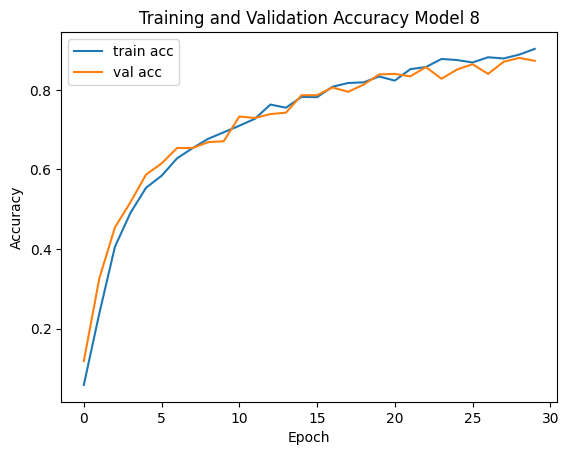

In [ ]:
#Model Evaluation

val_loss, val_acc = model8.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 8')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

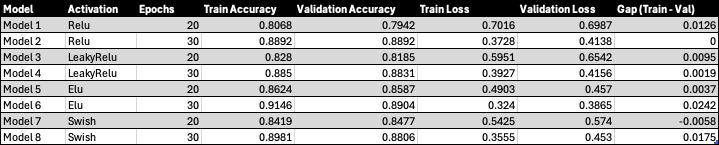


The best raw accuracy was achieved by the ELU activation with 30 epochs, reaching a validation accuracy of 0.8904. However, the ReLU model trained for 30 epochs is the best overall choice, as it combines almost the same accuracy (0.8892) with simplicity, fast computation, and perfect generalization without overfitting. Its performance can be further improved by adding Batch Normalization after the convolutional layers and a 0.5 Dropout before the dense layer, which can help boost accuracy while maintaining efficiency and stability.

In [ ]:
# Model - 9 (Conv.layer - 3, Activation function - relu, epoch - 30, Flatten instead of GlobalAveragePooling)

model9 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])

model9.summary()

model9.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model9.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 39)             │     3,913,767 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,007,015 (15.29 MB)

 Trainable params: 4,007,015 (15.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.2530 - loss: 3.1583 - val_accuracy: 0.6602 - val_loss: 1.2291
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.7870 - loss: 0.7841 - val_accuracy: 0.7966 - val_loss: 0.7265
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.9351 - loss: 0.2668 - val_accuracy: 0.7917 - val_loss: 0.8713
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9763 - loss: 0.0890 - val_accuracy: 0.7917 - val_loss: 1.0566
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.9825 - loss: 0.0615 - val_accuracy: 0.8307 - val_loss: 0.9402
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.7954 - val_loss: 1.5061
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.9888 - loss: 0.0454 - val_accuracy: 0.7174 - val_loss: 1.5827
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9788 - loss: 0.0816 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7941 - loss: 2.1031
Validation accuracy: 0.7771


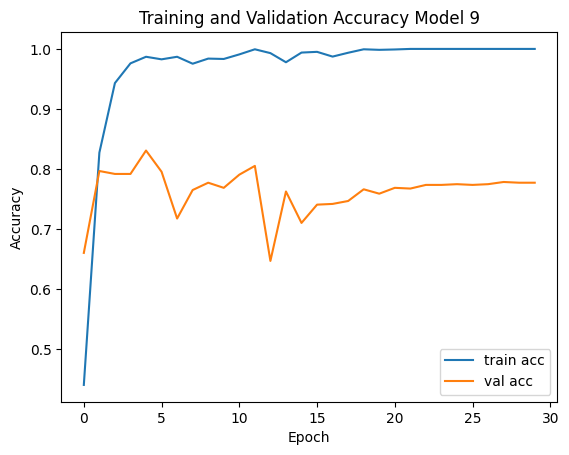

In [ ]:
#Model Evaluation

val_loss, val_acc = model9.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 9')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

When using a Flatten layer, the model overfits because it massively increases parameters; using GlobalAveragePooling keeps parameters low and generalizes better, so we should stick with GAP and adjust other settings instead.

In [ ]:
# Model - 10 (Conv.layer - 3, Activation function - relu, epoch - 30, GolbalMaxPooling instead of GlobalAveragePooling)

model10 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalMaxPooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model10.summary()

model10.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model10.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.0695 - loss: 3.5177 - val_accuracy: 0.4458 - val_loss: 2.1763
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.4672 - loss: 1.9663 - val_accuracy: 0.6005 - val_loss: 1.4024
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6278 - loss: 1.2960 - val_accuracy: 0.6663 - val_loss: 1.1328
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.7356 - loss: 0.9362 - val_accuracy: 0.7418 - val_loss: 0.9654
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7816 - loss: 0.7693 - val_accuracy: 0.8015 - val_loss: 0.6794
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.8435 - loss: 0.5834 - val_accuracy: 0.8404 - val_loss: 0.5972
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.8707 - loss: 0.4503 - val_accuracy: 0.8161 - val_loss: 0.6708
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.8950 - loss: 0.3668 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9216 - loss: 0.3462
Validation accuracy: 0.9196


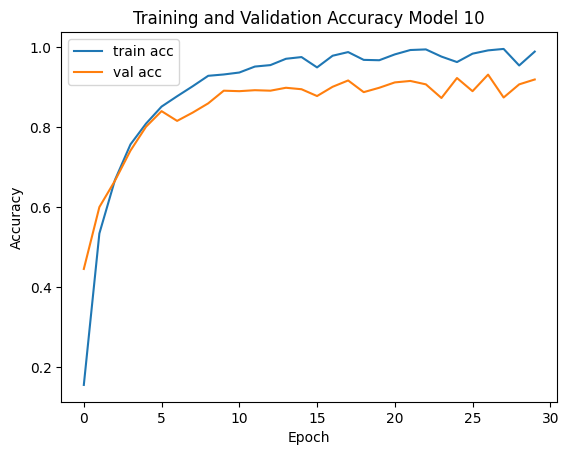

In [ ]:
#Model Evaluation

val_loss, val_acc = model10.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

GlobalMaxPooling boosts training accuracy quickly but overfits early, while GlobalAveragePooling learns more slowly and generalizes better on small datasets.

In [ ]:
# Model - 11 (Conv.layer - 3, Activation function - relu, epoch - 30, AveragePooling instead of MaxPooling)

model11 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model11.summary()

model11.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model11.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 112, 112, 32)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 56, 56, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 28, 28, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.0485 - loss: 3.5908 - val_accuracy: 0.1657 - val_loss: 3.0262
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.2058 - loss: 2.9262 - val_accuracy: 0.2692 - val_loss: 2.6307
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.3125 - loss: 2.5523 - val_accuracy: 0.3508 - val_loss: 2.3814
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.3863 - loss: 2.2872 - val_accuracy: 0.4227 - val_loss: 2.2214
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4570 - loss: 2.0601 - val_accuracy: 0.3959 - val_loss: 2.3185
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.4656 - loss: 1.9760 - val_accuracy: 0.5493 - val_loss: 1.7177
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5298 - loss: 1.7724 - val_accuracy: 0.5286 - val_loss: 1.8284
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5412 - loss: 1.7000 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7786 - loss: 0.7439
Validation accuracy: 0.7978


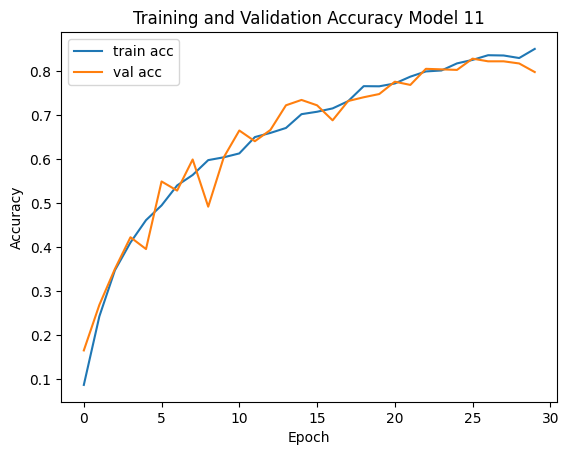

In [ ]:
# Model Evaluation

val_loss, val_acc = model11.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 11')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

AveragePooling reduced accuracy because it smooths features too much, while MaxPooling preserves the strongest and most discriminative signals. So we kept MaxPooling since it gives better performance despite needing regularization to control overfitting.

In [ ]:
# Model - 12 (Conv.layer - 3, Activation function - relu, epoch - 30, BathNormalization)

model12 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model12.summary()

model12.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model12.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 224, 224, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 112, 112, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 56, 56, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,951 (386.53 KB)

 Trainable params: 98,503 (384.78 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.2196 - loss: 3.0950 - val_accuracy: 0.0207 - val_loss: 4.6151
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5059 - loss: 2.0943 - val_accuracy: 0.1425 - val_loss: 3.1079
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.5833 - loss: 1.7507 - val_accuracy: 0.4957 - val_loss: 1.8004
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.6453 - loss: 1.4310 - val_accuracy: 0.5761 - val_loss: 1.5969
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.6753 - loss: 1.2820 - val_accuracy: 0.6273 - val_loss: 1.3000
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.7217 - loss: 1.1165 - val_accuracy: 0.5201 - val_loss: 1.8329
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.7530 - loss: 0.9842 - val_accuracy: 0.7418 - val_loss: 0.9358
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.7623 - loss: 0.9114 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7613 - loss: 0.7433
Validation accuracy: 0.7795


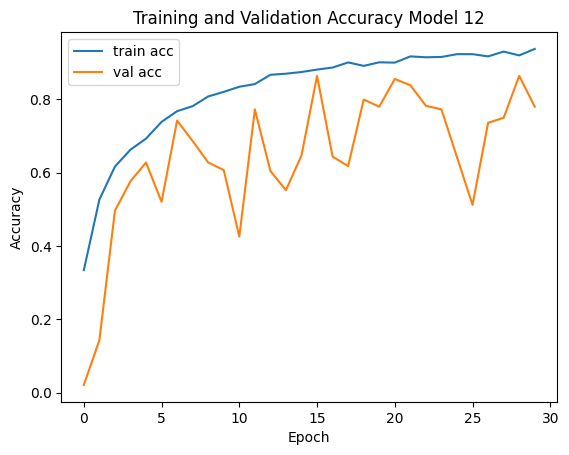

In [ ]:
# Model Evaluation

val_loss, val_acc = model12.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 12')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 13 (Conv.layer - 3, Activation function - relu, epoch - 30, BathNormalization, Dropout)

model13 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model13.summary()

model13.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model13.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 224, 224, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 112, 112, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 56, 56, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,951 (386.53 KB)

 Trainable params: 98,503 (384.78 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.1212 - loss: 3.4401 - val_accuracy: 0.0244 - val_loss: 3.9118
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2781 - loss: 2.7117 - val_accuracy: 0.0914 - val_loss: 3.5371
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.3574 - loss: 2.4104 - val_accuracy: 0.3325 - val_loss: 2.3236
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.4330 - loss: 2.1126 - val_accuracy: 0.5006 - val_loss: 1.9699
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.4573 - loss: 1.9975 - val_accuracy: 0.6029 - val_loss: 1.6036
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.4999 - loss: 1.8413 - val_accuracy: 0.5761 - val_loss: 1.6444
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5135 - loss: 1.7331 - val_accuracy: 0.5981 - val_loss: 1.5569
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5583 - loss: 1.6394 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6445 - loss: 1.1560
Validation accuracy: 0.6650


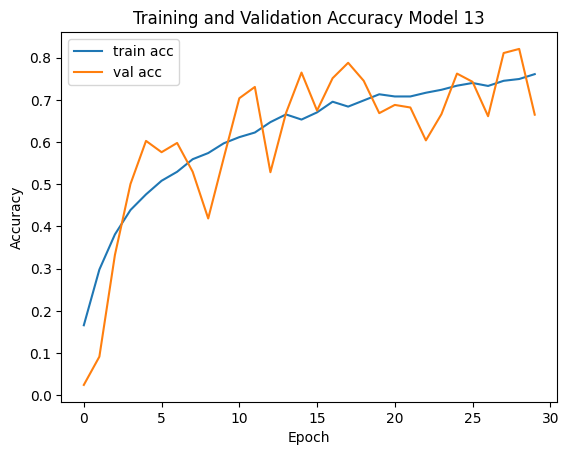

In [ ]:
# Model Evaluation

val_loss, val_acc = model13.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 13')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Model - 14 (Conv.layer - 3, Activation function - relu, epoch - 30, Dropout)

model14 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model14.summary()

model14.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model14.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_18     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.0396 - loss: 3.6419 - val_accuracy: 0.0743 - val_loss: 3.4174
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.0990 - loss: 3.3488 - val_accuracy: 0.2058 - val_loss: 2.9599
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.1745 - loss: 3.0269 - val_accuracy: 0.3812 - val_loss: 2.5434
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.2602 - loss: 2.7246 - val_accuracy: 0.4702 - val_loss: 2.2425
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.3581 - loss: 2.4194 - val_accuracy: 0.5225 - val_loss: 1.9879
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.3896 - loss: 2.2332 - val_accuracy: 0.5408 - val_loss: 1.8407
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4517 - loss: 2.0455 - val_accuracy: 0.5761 - val_loss: 1.7184
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.4960 - loss: 1.8859 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8466 - loss: 0.4931
Validation accuracy: 0.8477


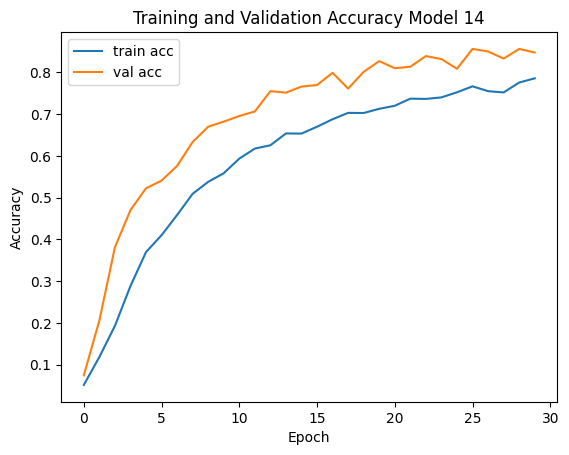

In [ ]:
# Model Evaluation

val_loss, val_acc = model14.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 14')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

The model is no longer overfitting and generalizes well. Now we can focus on improving accuracy by:

- Tuning the learning rate

- Adjusting Dropout (0.3–0.4)

- Adding BatchNormalization in deeper layers

- Using data augmentation



In [ ]:
# Model - 15 (Conv.layer - 3, Activation function - relu, epoch - 30, Dropout, Learning Rate - 3e-4)

model15 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model15.summary()

model15.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model15.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.0274 - loss: 3.6542 - val_accuracy: 0.0512 - val_loss: 3.5151
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.0636 - loss: 3.4877 - val_accuracy: 0.1766 - val_loss: 3.2372
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1324 - loss: 3.2505 - val_accuracy: 0.2400 - val_loss: 2.9849
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.1567 - loss: 3.0924 - val_accuracy: 0.3203 - val_loss: 2.8341
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.1892 - loss: 2.9563 - val_accuracy: 0.3910 - val_loss: 2.6524
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.2245 - loss: 2.7911 - val_accuracy: 0.3983 - val_loss: 2.5297
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.2501 - loss: 2.7000 - val_accuracy: 0.4336 - val_loss: 2.4141
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.2730 - loss: 2.6216 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7018 - loss: 1.2092
Validation accuracy: 0.6931


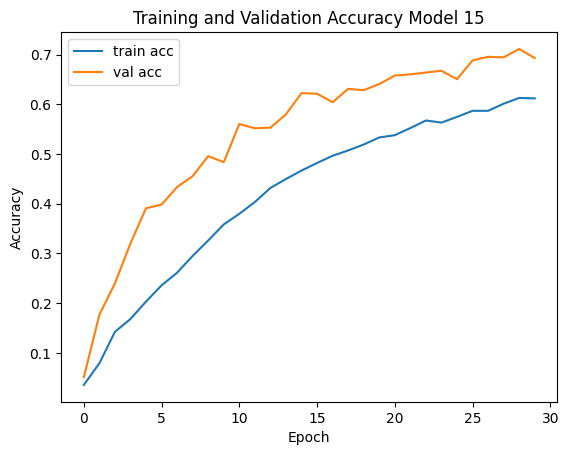

In [ ]:
# Model Evaluation

val_loss, val_acc = model15.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 15')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Slower learning prevents overfitting but needs more epochs to reach full accuracy.

In [ ]:
# Model - 16 (Conv.layer - 3, Activation function - relu, epoch - 30, Dropout, RMSprop optimizer)

model16 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model16.summary()

model16.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model16.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_20     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,279 (383.90 KB)

 Trainable params: 98,279 (383.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.0224 - loss: 3.6630 - val_accuracy: 0.0219 - val_loss: 3.6510
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.0419 - loss: 3.6457 - val_accuracy: 0.0767 - val_loss: 3.6295
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.0547 - loss: 3.6188 - val_accuracy: 0.0926 - val_loss: 3.5847
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.0708 - loss: 3.5848 - val_accuracy: 0.1011 - val_loss: 3.5276
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.0781 - loss: 3.5240 - val_accuracy: 0.0914 - val_loss: 3.4635
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.0838 - loss: 3.4677 - val_accuracy: 0.0828 - val_loss: 3.3994
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.1038 - loss: 3.4075 - val_accuracy: 0.1084 - val_loss: 3.3416
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.0950 - loss: 3.3807 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4465 - loss: 2.4580
Validation accuracy: 0.4373


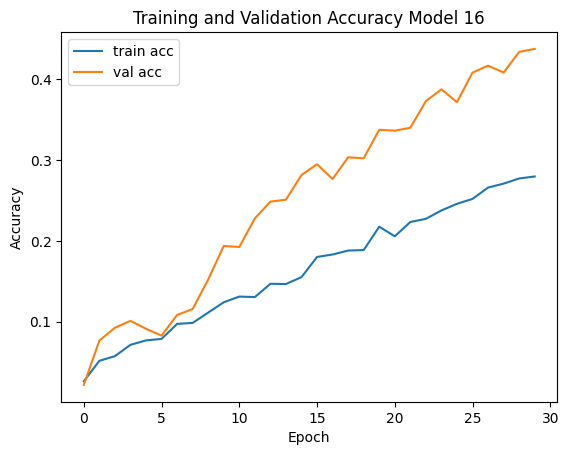

In [ ]:
# Model Evaluation

val_loss, val_acc = model16.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Although RMSprop showed slightly better stability and validation performance than Adam, the overall accuracy after 30 epochs was only around 0.4, indicating that the model has not fully converged and would require more epochs to reach its potential. Given this, it makes sense to stick with Adam, which generally provides faster convergence and more consistent improvements in both training and validation accuracy

In [6]:
# Model - 17 (Conv.layer - 3, Activation function - relu, epoch - 30, Dropout, One Batch Normalization layer)

model17 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model17.summary()

model17.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model17.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,791 (385.90 KB)

 Trainable params: 98,535 (384.90 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2541s 12s/step - accuracy: 0.0972 - loss: 3.4330 - val_accuracy: 0.0548 - val_loss: 3.4815
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2645 - loss: 2.7933 - val_accuracy: 0.2168 - val_loss: 2.9886
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.3961 - loss: 2.3142 - val_accuracy: 0.4689 - val_loss: 2.0079
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.4763 - loss: 2.0449 - val_accuracy: 0.5323 - val_loss: 1.7937
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.5115 - loss: 1.8568 - val_accuracy: 0.5371 - val_loss: 1.7072
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.5377 - loss: 1.7121 - val_accuracy: 0.6066 - val_loss: 1.5220
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5893 - loss: 1.5776 - val_accuracy: 0.6760 - val_loss: 1.2317
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.6144 - loss: 1.4108 -

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8848 - loss: 0.3859
Validation accuracy: 0.8794


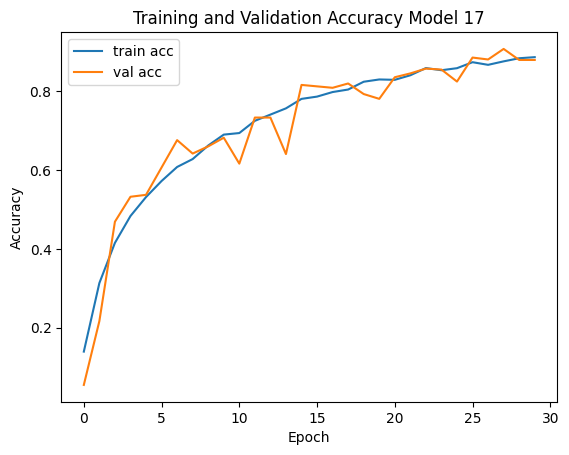

In [7]:
# Model Evaluation

val_loss, val_acc = model17.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 17')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

By adding one BatchNormalization layer after the last Conv block, your model reached 0.9 validation accuracy without overfitting. The fact that this accuracy is stable around 28 epochs shows that the model has found a sweet spot: it’s learning meaningful features, generalizing well, and not memorizing the training data. This is the ideal balance between capacity and regularization for your dataset.

In [7]:
# Model - 18 (Conv.layer - 3, Activation function - relu, epoch - 30, Dropout - 0.4, One Batch Normalization layer)

model18 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model18.summary()

model18.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model18.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,791 (385.90 KB)

 Trainable params: 98,535 (384.90 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2305s 11s/step - accuracy: 0.1077 - loss: 3.4106 - val_accuracy: 0.2314 - val_loss: 3.2690
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.2946 - loss: 2.7037 - val_accuracy: 0.3532 - val_loss: 2.4957
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.4186 - loss: 2.2520 - val_accuracy: 0.4190 - val_loss: 2.1201
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.4897 - loss: 1.9719 - val_accuracy: 0.6163 - val_loss: 1.5540
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.5421 - loss: 1.7093 - val_accuracy: 0.4872 - val_loss: 1.7994
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.5923 - loss: 1.5499 - val_accuracy: 0.5773 - val_loss: 1.5601
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6116 - loss: 1.4279 - val_accuracy: 0.5956 - val_loss: 1.4603
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.6664 - loss: 1.2458 -

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8989 - loss: 0.3621
Validation accuracy: 0.8904


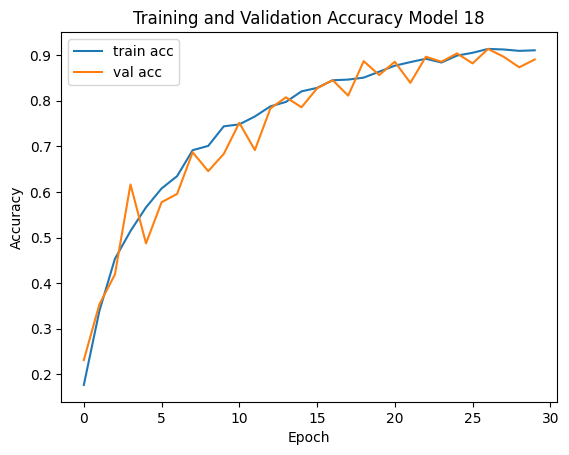

In [8]:
# Model Evaluation

val_loss, val_acc = model18.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 18')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

With Dropout = 0.4, the model keeps more neurons active, so training accuracy rises and becomes close to validation accuracy, which slightly increases overfitting. Increasing Dropout to 0.5 reduces active neurons during training, adding stronger regularization, lowering training accuracy slightly, and keeping the model better generalized, making it the safer choice for your small dataset.

In [10]:
# Model - 19 (Conv.layer - 4, Activation function - relu, epoch - 30, Dropout- 0.5, One Batch Normalization layer)

model19 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),


    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model19.summary()

model19.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model19.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,375 (962.40 KB)

 Trainable params: 246,119 (961.40 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.1106 - loss: 3.4012 - val_accuracy: 0.2058 - val_loss: 3.0949
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.3271 - loss: 2.5585 - val_accuracy: 0.5164 - val_loss: 1.9764
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.4580 - loss: 2.0538 - val_accuracy: 0.5761 - val_loss: 1.6397
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.5504 - loss: 1.7362 - val_accuracy: 0.5834 - val_loss: 1.4892
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.6184 - loss: 1.4575 - val_accuracy: 0.6370 - val_loss: 1.2772
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.6628 - loss: 1.2805 - val_accuracy: 0.6565 - val_loss: 1.2672
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.6973 - loss: 1.1246 - val_accuracy: 0.6602 - val_loss: 1.1507
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.7528 - loss: 0.9318 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9625 - loss: 0.1283
Validation accuracy: 0.9513


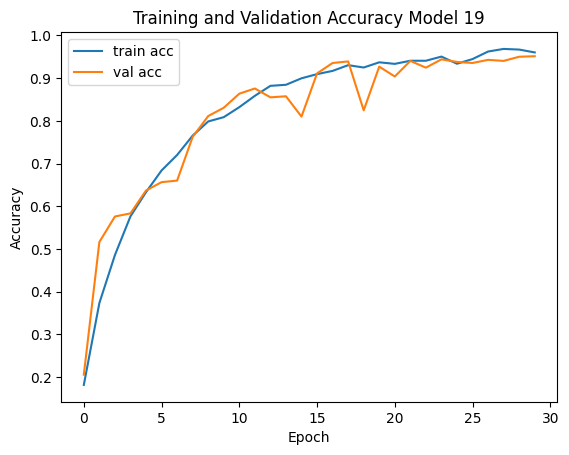

In [11]:
# Model Evaluation

val_loss, val_acc = model19.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 19')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

By adding an additional Conv layer, the model can capture more complex features, which may slightly improve accuracy. The current results show high validation performance, so the extra layer helps refine feature extraction without causing overfitting.

In [12]:
# Model - 20 (Conv.layer - 4, Activation function - relu, epoch - 30, Dropout- 0.45, One Batch Normalization layer)

model20 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),


    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.45),
    layers.Dense(num_classes, activation='softmax')
])

model20.summary()

model20.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model20.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,375 (962.40 KB)

 Trainable params: 246,119 (961.40 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.0998 - loss: 3.4319 - val_accuracy: 0.1717 - val_loss: 3.1435
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.2802 - loss: 2.7154 - val_accuracy: 0.4568 - val_loss: 2.2377
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.4234 - loss: 2.2122 - val_accuracy: 0.4994 - val_loss: 1.7707
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.5199 - loss: 1.8506 - val_accuracy: 0.3971 - val_loss: 2.0175
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.5812 - loss: 1.5761 - val_accuracy: 0.6078 - val_loss: 1.3628
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.6547 - loss: 1.3238 - val_accuracy: 0.6529 - val_loss: 1.2332
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.7241 - loss: 1.0745 - val_accuracy: 0.7333 - val_loss: 0.9736
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.7449 - loss: 0.9650 - 

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9660 - loss: 0.1111
Validation accuracy: 0.9659


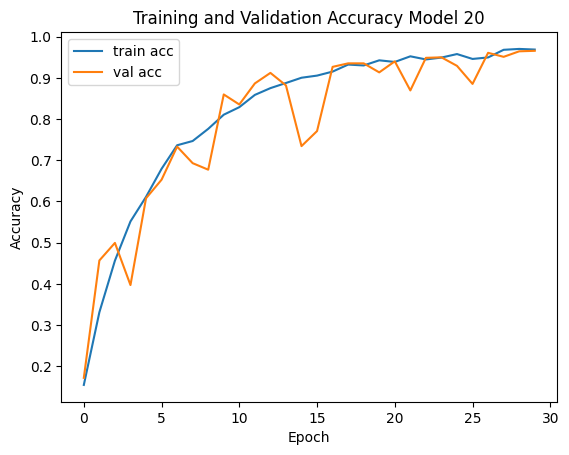

In [13]:
 # Model Evaluation

val_loss, val_acc = model20.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training and Validation Accuracy Model 20')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

This model has the highest accuracy of 96% and this is the best model.

In [20]:
# Save model

import os
model_dir = '/content/drive/MyDrive/Colab Notebooks/models/'
os.makedirs(model_dir, exist_ok=True)

# Save the model in that directory
model20.save(model_dir + 'best_model_team1.keras')
